In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

In [2]:
# in open() you should type your own path of these files(Goal1CompletionLocation_Goal1Completions.json and
#Sessions_Page.json'))
with open('task_data/Goal1CompletionLocation_Goal1Completions.json') as data_file:    
    data_goal = json.load(data_file)
with open('task_data/Sessions_Page.json') as data_file:    
    data_session = json.load(data_file)
pprint(data_session)

{'reports': [{'columnHeader': {'dimensions': ['ga:pagePath'],
                               'metricHeader': {'metricHeaderEntries': [{'name': 'ga:sessions',
                                                                         'type': 'INTEGER'}]}},
              'data': {'rows': [{'dimensions': ['/'],
                                 'metrics': [{'values': ['5925']}]},
                                {'dimensions': ['/?_hsenc=p2ANqtz-_McBb_ag9eyaYD3mJjDG7G_uB3uhgGcsBxi15N7Dkx2CB6Q4EicvyM4qxz_QhoX49gt27HZU9461DeUyoMURHz597MYA&_hsmi=42202727'],
                                 'metrics': [{'values': ['1']}]},
                                {'dimensions': ['/?_hsenc=p2ANqtz-_ORc__Ui5VKSGvLO72LiNTFW98hg-mQlkIsltDFF4bZnKtFg4qvG21fhsL8zvY5rcQaRGke58VTsOsZTHhcAw7YWQMDvVnC8flaNVmXtZ3Pt9_sRI&_hsmi=45155107'],
                                 'metrics': [{'values': ['1']}]},
                                {'dimensions': ['/?_hsenc=p2ANqtz-_PMnaFvC1MTCPb_RghCCNcPyb6VHPUfs1AGacdBEc6k4WIkLbn

In [3]:
pprint(data_goal)

{'reports': [{'columnHeader': {'dimensions': ['ga:goalCompletionLocation'],
                               'metricHeader': {'metricHeaderEntries': [{'name': 'ga:goal1Completions',
                                                                         'type': 'INTEGER'}]}},
              'data': {'isDataGolden': True,
                       'maximums': [{'values': ['85']}],
                       'minimums': [{'values': ['1']}],
                       'rowCount': 7,
                       'rows': [{'dimensions': ['(entrance)'],
                                 'metrics': [{'values': ['6']}]},
                                {'dimensions': ['/'],
                                 'metrics': [{'values': ['85']}]},
                                {'dimensions': ['/portfolio-single-gallery.html'],
                                 'metrics': [{'values': ['1']}]},
                                {'dimensions': ['/TMRW_Byte_Cafe.php'],
                                 'metrics': [{'values': [

In [6]:
data_session_rows = data_session['reports'][0]['data']['rows']
data_goal_rows = data_goal['reports'][0]['data']['rows']
pd_session_rows = pd.io.json.json_normalize(data_session_rows)
pd_goal_rows = pd.io.json.json_normalize(data_goal_rows)[1:]
pd_goal_rows['dimensions'] = pd_goal_rows['dimensions'].astype(str)
pd_session_rows['dimensions'] = pd_session_rows['dimensions'].astype(str)
pd_session_rows.columns = ['dimensions','session_metrics']
pd_goal_rows.columns = ['dimensions','goal_metrics']
pd_conversion = pd_session_rows.set_index('dimensions').join(pd_goal_rows.set_index('dimensions'), how = 'inner')
def str_upd(test_val):
    '''update page name'''
    return test_val[2:-1]
def into_num(test_val):
    '''convert string into int in json'''
    return int(test_val[0]['values'][0])
pd_conversion.reset_index(inplace = True)
pd_conversion['dimensions'] = pd_conversion['dimensions'].apply(lambda x: str_upd(x))
pd_conversion.set_index('dimensions',inplace = True)
pd_conversion['session_metrics'] = pd_conversion['session_metrics'].apply(lambda x: into_num(x))
pd_conversion['goal_metrics'] = pd_conversion['goal_metrics'].apply(lambda x: into_num(x))
pd_conversion['conversion_rate'] = pd_conversion['goal_metrics']/pd_conversion['session_metrics']*100
pd_conversion

,session_metrics,goal_metrics,conversion_rate
dimensions,,,
/',5925,85,1.434599
/portfolio-single-gallery.html',2,1,50.000000
/TMRW_Byte_Cafe.php',270,22,8.148148
/TMRW_FAQs.php',129,24,18.604651
/TMRW_Get_in_touch.php',4,3,75.000000
/TMRW_the_team.php',140,5,3.571429


# Histogram  of conversion rate for pages

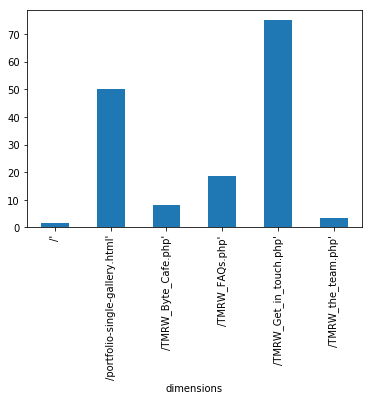

In [7]:
pd_conversion['conversion_rate'].plot(kind = 'bar')

# The best converting page on site

In [8]:
print ("The best converting page on your site is "+ 
pd_conversion.sort_values(by = 'conversion_rate')[-1:]['conversion_rate'].index.values[0] 
+ "  with conversion rate "
+str(pd_conversion.sort_values(by = 'conversion_rate')[-1:]['conversion_rate'].values[0]) +
      " %.")

The best converting page on your site is /TMRW_Get_in_touch.php'  with conversion rate 75.0 %.
